In [37]:
import networkx as nx
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
# Define the network the infection will spread on

# Using Karate Club Graph as a baseline
global G
G = nx.karate_club_graph()
G.graph["pos"] = nx.spring_layout(G)

# Initialize state variables
# Susceptible = 0
# Infected = 1
# Recovered = 2
S, I, R = range(3)

# Define color choices for states
c = {
    S: "y",
    I: "r",
    R: "g"
}

In [106]:
def initialize():
    for i in G.nodes():
        G.nodes[i]["state"] = S # all nodes susceptible
    # infect a single, specific node
    G.nodes[0]["state"] = I

In [107]:
initialize()

In [108]:
def observe():
    nx.draw_networkx(G, 
        node_color=[c[G.nodes[i]["state"]] for i in G.nodes()],
        pos=G.graph["pos"]
    )

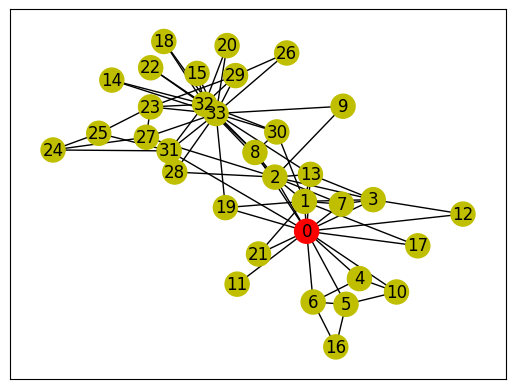

In [109]:
observe()

In [110]:
def update():
    for i in G.nodes():
        # set default next state to be the current state
        G.nodes[i]["nextstate"] = G.nodes[i]["state"]
        
        # set dynamical behavior to update states
        if G.nodes[i]["state"] == S:
            # Simulate the dynamics of S nodes
            
            # count number of Infected neighbors
            n = sum(1 if G.nodes[j]["state"] == I else 0 for j in G.neighbors(i))
            # Randomly Infect with some probability
            if random.random() < 0.5 * np.log10(n+1):
                G.nodes[i]["nextstate"] = I
            
        elif G.nodes[i]["state"] == I:
            # Simulate the dynamics of I nodes
            # Randomly Recover with some probability
            if random.random() < 0.2:
                G.nodes[i]["nextstate"] = R
        else:
            # Simulate the dynamics of R nodes
            # Randomly become Susceptible again with some probability
            if random.random() < 0.003:
                G.nodes[i]["nextstate"] = S
    
    # Update all node states
    for i in G.nodes():
        G.nodes[i]["state"] = G.nodes[i]["nextstate"]
        print(G.nodes[i])
#         G.nodes[i]["nextstate"] = np.NaN

In [154]:
update()

{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 0, 'nextstate': 0}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Officer', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Officer', 'state': 2, 'nextstate': 2}
{'club': 'Officer', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 0, 'nextstate': 0}
{'club': 'Mr. Hi', 'state': 2, 'nextstate': 2}
{'club': 'Officer', 'state': 2, 'nextstate': 2}
{'club': 'Mr. Hi', 'state': 0, 'nextstate': 0}
{'club': 'Officer', 'state': 0, 'nextstate': 0}
{'club':

In [56]:
for i in G.nodes():
    n = sum(1 if G.nodes[j]["state"] == I else 0 for j in G.neighbors(i))
    print("Node ", i, " | # Infected neighbors: \t", n)

Node  0  | # Infected neighbors: 	 0
Node  1  | # Infected neighbors: 	 1
Node  2  | # Infected neighbors: 	 1
Node  3  | # Infected neighbors: 	 1
Node  4  | # Infected neighbors: 	 1
Node  5  | # Infected neighbors: 	 1
Node  6  | # Infected neighbors: 	 1
Node  7  | # Infected neighbors: 	 1
Node  8  | # Infected neighbors: 	 1
Node  9  | # Infected neighbors: 	 0
Node  10  | # Infected neighbors: 	 1
Node  11  | # Infected neighbors: 	 1
Node  12  | # Infected neighbors: 	 1
Node  13  | # Infected neighbors: 	 1
Node  14  | # Infected neighbors: 	 0
Node  15  | # Infected neighbors: 	 0
Node  16  | # Infected neighbors: 	 0
Node  17  | # Infected neighbors: 	 1
Node  18  | # Infected neighbors: 	 0
Node  19  | # Infected neighbors: 	 1
Node  20  | # Infected neighbors: 	 0
Node  21  | # Infected neighbors: 	 1
Node  22  | # Infected neighbors: 	 0
Node  23  | # Infected neighbors: 	 0
Node  24  | # Infected neighbors: 	 0
Node  25  | # Infected neighbors: 	 0
Node  26  | # Infected